# New York Baseball Team Popularity
Between 1962 and 2018, there have been two Major League Baseball teams in New York, the Mets and the Yankees.  Each team's popularity has fluctuated over time.  We will create a visualization that attempts to answer the question 'Who has been New York's most popular baseball team between 1962 and 2018?'

**Data Sources**
* http://newyork.mets.mlb.com/nym/history/year_by_year_results.jsp
* https://en.wikipedia.org/wiki/List_of_New_York_Mets_seasons
* https://en.wikipedia.org/wiki/Polo_Grounds
* https://en.wikipedia.org/wiki/Shea_Stadium
* https://en.wikipedia.org/wiki/Citi_Field
* http://newyork.yankees.mlb.com/nyy/history/year_by_year_results.jsp
* https://en.wikipedia.org/wiki/List_of_New_York_Yankees_seasons
* https://en.wikipedia.org/wiki/Yankee_Stadium_(1923)
* https://en.wikipedia.org/wiki/Yankee_Stadium

## Data Aggregation
Load Mets and Yankees season-by-season data from separate CSV files into one Pandas DataFrame with with MultiIndex 'Season'/'Team'

In [1]:
import pandas as pd

results_mets = pd.read_csv('mets-results.csv')
results_mets.head()

,Season,Team,League,W,L,PCT,GB,Place,Attendance,Capacity,Playoffs,Champions
0,1962,New York Mets,National League,40,120,0.250,60.5,10,925807,56000,0,0
1,1963,New York Mets,National League,51,111,0.315,48,10,1077322,56000,0,0
2,1964,New York Mets,National League,53,109,0.327,40,10,1734389,55300,0,0
3,1965,New York Mets,National League,50,112,0.309,47,10,1755366,55300,0,0
4,1966,New York Mets,National League,66,95,0.410,28.5,9,1891634,55300,0,0


In [2]:
results_yankees = pd.read_csv('yankees-results.csv')
results_yankees.head()

,Season,Team,League,W,L,PCT,GB,Place,Attendance,Capacity,Playoffs,Champions
0,1962,New York Yankees,American League,96,66,0.593,-,1,1606325,67337,1,1
1,1963,New York Yankees,American League,104,57,0.646,-,1,1460537,67337,1,0
2,1964,New York Yankees,American League,99,63,0.611,-,1,1305638,67337,1,0
3,1965,New York Yankees,American League,77,85,0.475,25,6,1304296,67000,0,0
4,1966,New York Yankees,American League,70,89,0.440,26.5,10,1224803,67000,0,0


In [3]:
import numpy as np

results = pd.concat([results_mets, results_yankees])
results.set_index(['Season', 'Team'], inplace=True)
results['Attendance'] = results['Attendance']/10**6
results.head()

,,League,W,L,PCT,GB,Place,Attendance,Capacity,Playoffs,Champions
Season,Team,,,,,,,,,,
1962,New York Mets,National League,40,120,0.250,60.5,10,0.925807,56000,0,0
1963,New York Mets,National League,51,111,0.315,48,10,1.077322,56000,0,0
1964,New York Mets,National League,53,109,0.327,40,10,1.734389,55300,0,0
1965,New York Mets,National League,50,112,0.309,47,10,1.755366,55300,0,0
1966,New York Mets,National League,66,95,0.410,28.5,9,1.891634,55300,0,0


Now that we have Mets and Yankees season-by-season data in a consistent format, create a Mets DataFrame and a Yankees DataFrame to visualize each team individually

In [4]:
results_mets = results.iloc[results.index.get_level_values('Team') == 'New York Mets']
results_mets.head()

,,League,W,L,PCT,GB,Place,Attendance,Capacity,Playoffs,Champions
Season,Team,,,,,,,,,,
1962,New York Mets,National League,40,120,0.250,60.5,10,0.925807,56000,0,0
1963,New York Mets,National League,51,111,0.315,48,10,1.077322,56000,0,0
1964,New York Mets,National League,53,109,0.327,40,10,1.734389,55300,0,0
1965,New York Mets,National League,50,112,0.309,47,10,1.755366,55300,0,0
1966,New York Mets,National League,66,95,0.410,28.5,9,1.891634,55300,0,0


In [5]:
results_yankees = results.iloc[results.index.get_level_values('Team') == 'New York Yankees']
results_yankees.head()

,,League,W,L,PCT,GB,Place,Attendance,Capacity,Playoffs,Champions
Season,Team,,,,,,,,,,
1962,New York Yankees,American League,96,66,0.593,-,1,1.606325,67337,1,1
1963,New York Yankees,American League,104,57,0.646,-,1,1.460537,67337,1,0
1964,New York Yankees,American League,99,63,0.611,-,1,1.305638,67337,1,0
1965,New York Yankees,American League,77,85,0.475,25,6,1.304296,67000,0,0
1966,New York Yankees,American League,70,89,0.440,26.5,10,1.224803,67000,0,0


## Data Visualization
We will use annual home-game attendance as a proxy for popularity.  We will consider a team 'more popular' if they had a higher annual home-game attendance.  Since most MLB games do not sell-out, we do not normalize by stadium size and assume stadium size is not a limiting factor in team popularity

We also find that normalizing by stadium size shows similar results and makes for a less intuitive visualization

<IPython.core.display.Javascript object>


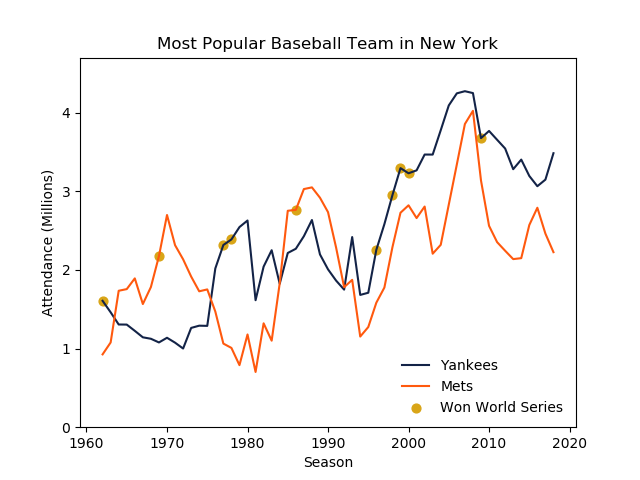

In [6]:
%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1);

# hex line colors
yankees_navy = '#132347'
mets_orange = '#FF590E'
world_series_gold = '#D9A517'

In [7]:
plt.sca(ax)
plt.cla()

ax.set_title('Most Popular Baseball Team in New York')

ws_champs = results[results['Champions'] == 1]
plt.scatter(
    ws_champs.index.get_level_values('Season'),
    ws_champs['Attendance'],
    label='Won World Series',
    c=world_series_gold,
    s=40
);
plt.plot(
    results_yankees.index.get_level_values('Season'),
    results_yankees['Attendance'],
    label='Yankees',
    color=yankees_navy
);
plt.plot(
    results_mets.index.get_level_values('Season'),
    results_mets['Attendance'],
    label='Mets',
    color=mets_orange
);

y_buffer = 1.1
plt.ylim(0, max(results['Attendance'])*y_buffer)
ax.set_ylabel('Attendance (Millions)');

ax.set_xlabel('Season')

plt.legend(loc=4, frameon=False);

plt.show();

## Conclusion
Between 1962 and 2018, the New York Yankees have generally been the more popular baseball team in New York.  This is due, in large part, because the Yankees have won 8 World Series championships in this time while the Mets have won only 2

The only times the Mets have been more popular than the Yankees have been around their two World Series championships (1969 and 1986).  This shows that the most popular baseball team in New York is directly related to the probability that team will win the World Series

Another interesting trend shown in this visualization is the meteoric rise in popularity of both teams between the strike-shortened season in 1994 and the peak of the steroid era in the early 2000's with annual attendance more than doubling for both teams during that time period. This increase in popularity for the sport could explain Major League Baseball's initial reluctance to discipline players for steroid use though more research would need to be done to support this claim